In [1]:
import pandas as pd

In [2]:
dataset_list = ['FRED/GDP', 'FRED/INDPRO']

In [3]:
for dataset in dataset_list:
    
    # read csv file
    try:
        filename = '_'.join(dataset.split('/'))
        df = pd.read_csv('./data_files/' + filename + '.csv')
    except:
        print("Failed to read {}.csv".format(filename))

    # assume 2-col format with first col. date, second col. value
    df.columns = ['Date', filename]
    print(df.columns)
    
    # change type of date column to date time
    df[['Date']] = df[['Date']].apply(pd.to_datetime)
    
    # merge multiple time serues
    if 'df_all' in locals():
        df_all = df_all.merge(df, on = 'Date', how='outer', sort = True)
    else:
        df_all = df.copy()
    
df_all.head()

Index(['Date', 'FRED_GDP'], dtype='object')
Index(['Date', 'FRED_INDPRO'], dtype='object')


,Date,FRED_GDP,FRED_INDPRO
0,1919-01-01,NaN,5.0346
1,1919-02-01,NaN,4.8121
2,1919-03-01,NaN,4.6730
3,1919-04-01,NaN,4.7565
4,1919-05-01,NaN,4.7843


In [4]:
df_all.interpolate(method='spline', order=2, inplace = True)

if df_all.index.name != 'Date':
    df_all.set_index('Date', inplace=True)

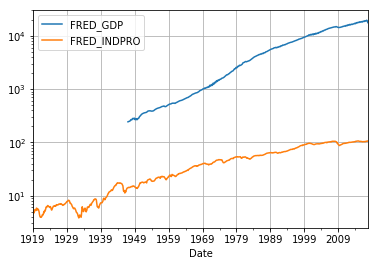

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df_all.plot(logy=True, grid = True)

In [6]:
df_Q = df_all.resample('Q')

In [7]:
df_all.index

DatetimeIndex(['1919-01-01', '1919-02-01', '1919-03-01', '1919-04-01',
               '1919-05-01', '1919-06-01', '1919-07-01', '1919-08-01',
               '1919-09-01', '1919-10-01',
               ...
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01'],
              dtype='datetime64[ns]', name='Date', length=1186, freq=None)